<a href="https://colab.research.google.com/github/kidkils/CarPrice_Prediction/blob/main/CarPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [87]:
url = 'https://raw.githubusercontent.com/kidkils/CarPrice_Prediction/main/CarPrice_Assignment.csv'
df = pd.read_csv(url)

In [88]:
df.shape

(205, 26)

In [89]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Cheking the null values

In [90]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [91]:
cdf = df[["enginesize","horsepower","price"]]
cdf.head(10)

,enginesize,horsepower,price
0,130,111,13495.000
1,130,111,16500.000
2,152,154,16500.000
3,109,102,13950.000
4,136,115,17450.000
5,136,110,15250.000
6,136,110,17710.000
7,136,110,18920.000
8,131,140,23875.000
9,131,160,17859.167


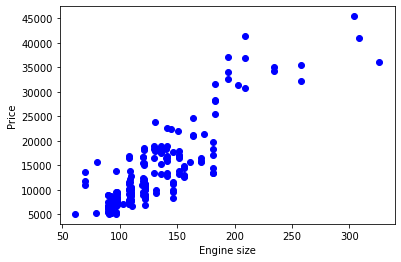

In [92]:
plt.scatter(cdf["enginesize"], cdf["price"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Price")
plt.show()

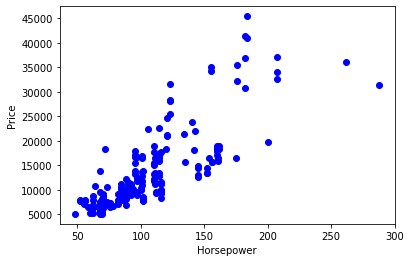

In [93]:
plt.scatter(cdf["horsepower"], cdf["price"],  color='blue')
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show() 

Creating train and test data

In [94]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Building Linear Model

In [95]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['enginesize','horsepower']])
y = np.asanyarray(train[['price']])
regr.fit (x,y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[118.4192903   50.45229965]]
Intercept:  [-7029.03907719]


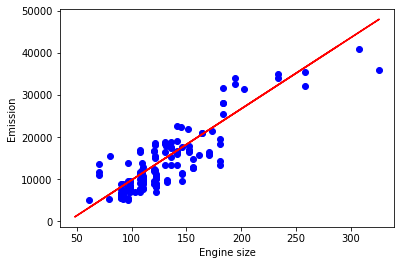

In [96]:
plt.scatter(train["enginesize"], train["price"],  color='blue')
plt.plot(x,regr.coef_[0][0]*x + regr.coef_[0][1]*x + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Prediction Making

In [97]:
y_hat= regr.predict(test[['enginesize','horsepower']])
x = np.asanyarray(test[['enginesize','horsepower']])
y = np.asanyarray(test[['price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 21012620.73
Variance score: 0.79


Making prediction of a car out of the dataset

In [98]:
test_car_features = [200,200]
test_car_price = (regr.coef_[0][0]*test_car_features[0] + regr.coef_[0][1]*test_car_features[1] + regr.intercept_[0])
print("Aracın fiyat tahmini: ",int(test_car_price),"$")

Aracın fiyat tahmini:  26745 $
